In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

AGRI_CENSUS = '../data/agri_census_finance.csv'

WOH = ['DELAWARE', 'GREENE', 'SCHOHARIE', 'SULLIVAN', 'ULSTER']

# 1 Data Cleaning

In [11]:
df = pd.read_csv(AGRI_CENSUS)
df.columns

Index(['Program', 'Year', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'Value',
       'CV (%)'],
      dtype='object')

In [12]:
df.head(2)

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2017,YEAR,NaN,COUNTY,NEW YORK,36,EASTERN,60,SCHOHARIE,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $ / OPER...",PRODUCERS,PRODUCERS: (GENDER = FEMALE),"84,238",33.3
1,CENSUS,2017,YEAR,NaN,COUNTY,NEW YORK,36,EASTERN,60,SCHOHARIE,...,NaN,NaN,0,NaN,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $ / OPER...",TOTAL,NOT SPECIFIED,"88,589",21.7


In [13]:
# drop columns with just one value
num_unique = df.apply(pd.Series.nunique, axis=0)
cols_to_drop = num_unique[num_unique==1].index
df.drop(columns=cols_to_drop, inplace=True)
df.columns, df.shape

(Index(['Year', 'Week Ending', 'Ag District', 'Ag District Code', 'County',
        'County ANSI', 'Zip Code', 'Region', 'Watershed', 'Commodity',
        'Data Item', 'Domain', 'Domain Category', 'Value', 'CV (%)'],
       dtype='object'), (407, 15))

In [14]:
# drop columns with all null values
col_is_null = df.isnull().all()
cols_to_drop = col_is_null[col_is_null].index
df.drop(columns=cols_to_drop, inplace=True)
df.columns, df.shape

(Index(['Year', 'Ag District', 'Ag District Code', 'County', 'County ANSI',
        'Commodity', 'Data Item', 'Domain', 'Domain Category', 'Value',
        'CV (%)'],
       dtype='object'), (407, 11))

In [15]:
# drop redundant columns
cols_to_drop = ['Ag District Code', 'County ANSI', 'CV (%)']
df.drop(columns=cols_to_drop, inplace=True)
df.columns, df.shape

(Index(['Year', 'Ag District', 'County', 'Commodity', 'Data Item', 'Domain',
        'Domain Category', 'Value'],
       dtype='object'), (407, 8))

In [16]:
df = df.sort_values(['County', 'Year']).reset_index(drop=True)
df.head()

,Year,Ag District,County,Commodity,Data Item,Domain,Domain Category,Value
0,1997,SOUTHEAST,DELAWARE,COMMODITY TOTALS,"COMMODITY TOTALS - SALES, MEASURED IN $ / OPER...",TOTAL,NOT SPECIFIED,"52,621"
1,1997,SOUTHEAST,DELAWARE,CROP TOTALS,"CROP TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"5,166,000"
2,1997,SOUTHEAST,DELAWARE,GOVT PROGRAMS,"GOVT PROGRAMS, FEDERAL - RECEIPTS, MEASURED IN...",TOTAL,NOT SPECIFIED,"1,889"
3,1997,SOUTHEAST,DELAWARE,GOVT PROGRAMS,"GOVT PROGRAMS, FEDERAL, CONSERVATION & WETLAND...",TOTAL,NOT SPECIFIED,"2,769"
4,1997,SOUTHEAST,DELAWARE,"INCOME, FARM-RELATED","INCOME, FARM-RELATED - RECEIPTS, MEASURED IN $...",TOTAL,NOT SPECIFIED,"5,544"


# 2 Viz

In [52]:
sorted(df['Data Item'].unique())

['COMMODITY TOTALS - SALES, MEASURED IN $ / OPERATION',
 'CROP TOTALS - SALES, MEASURED IN $',
 'CROP TOTALS - SALES, MEASURED IN PCT OF FARM SALES',
 'GOVT PROGRAMS, FEDERAL - RECEIPTS, MEASURED IN $ / OPERATION',
 'GOVT PROGRAMS, FEDERAL, (EXCL CONSERVATION & WETLANDS) - RECEIPTS, MEASURED IN $ / OPERATION',
 'GOVT PROGRAMS, FEDERAL, CONSERVATION & WETLANDS - RECEIPTS, MEASURED IN $ / OPERATION',
 'INCOME, FARM-RELATED - RECEIPTS, MEASURED IN $ / OPERATION',
 'INCOME, FARM-RELATED, AG TOURISM & RECREATIONAL SERVICES - RECEIPTS, MEASURED IN $',
 'INCOME, FARM-RELATED, FOREST PRODUCTS, (EXCL CHRISTMAS TREES & SHORT TERM WOODY CROPS & MAPLE SYRUP) - RECEIPTS, MEASURED IN $',
 'INCOME, FARM-RELATED, GOVT PROGRAMS, STATE & LOCAL - RECEIPTS, MEASURED IN $ / OPERATION',
 'INCOME, FARM-RELATED, RENT, LAND & BUILDINGS - RECEIPTS, MEASURED IN $']

In [65]:
def plot_census_data(subset_df):
    # data wrangling
    subset_df = subset_df.pivot(index='Year', columns='County', values='Value')
    subset_df = subset_df\
                    .fillna(0.0)\
                    .apply(lambda col: (col.str.replace('[^0-9]', ''))\
                                           .astype('float', errors='ignore'), axis=0) # convert string to proper integers
    subset_df.index = subset_df.index.astype('int')

    # plot
    subset_df.plot.line(marker='.', figsize=(9,5))
    plt.xticks(subset_df.index, rotation=90) # year labelling
    plt.xlabel('')
    plt.legend(bbox_to_anchor=(1,1))         # legend
    plt.grid(linestyle='--', alpha=.3)       # grid

Text(0.5, 1.0, 'COMMODITY TOTALS - SALES, MEASURED IN $ / OPERATION\n(WOH Counties)')

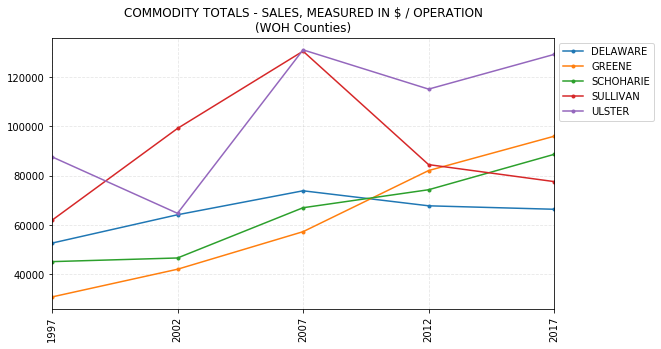

In [67]:
# for data_item in data_items:
data_item = 'COMMODITY TOTALS - SALES, MEASURED IN $ / OPERATION'
domain = 'TOTAL'
subset_df = df[(df['Data Item']==data_item) 
               & (df.Domain==domain) 
               & (df.County.isin(WOH))]
plot_census_data(subset_df)
plt.title(data_item+'\n(WOH Counties)')


Text(0.5, 1.0, 'CROP TOTALS - SALES, MEASURED IN $\n(WOH Counties)')

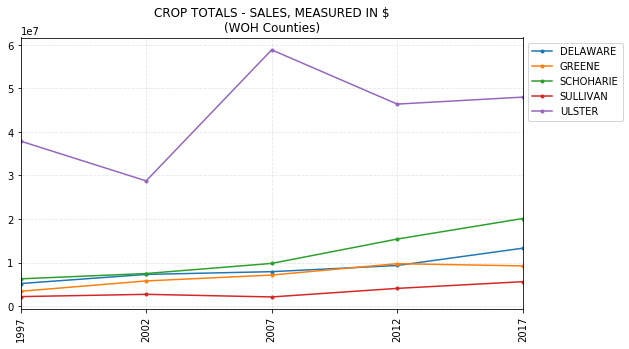

In [68]:
data_item = 'CROP TOTALS - SALES, MEASURED IN $'
domain = 'TOTAL'
subset_df = df[(df['Data Item']==data_item) 
               & (df.Domain==domain) 
               & (df.County.isin(WOH))]

plot_census_data(subset_df)
plt.title(data_item+'\n(WOH Counties)')


/Users/admin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2017.0, right=2017.0
  ax.set_xlim(left, right)


Text(0.5, 1.0, 'CROP TOTALS - SALES, MEASURED IN PCT OF FARM SALES\n(WOH Counties)')

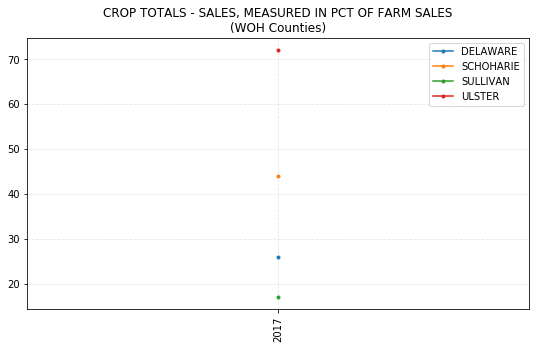

In [69]:
data_item = 'CROP TOTALS - SALES, MEASURED IN PCT OF FARM SALES'
subset_df = df[(df['Data Item']==data_item)
               & (df.County.isin(WOH))]
plot_census_data(subset_df)
plt.title(data_item+'\n(WOH Counties)')

Text(0.5, 1.0, 'INCOME, FARM-RELATED - RECEIPTS, MEASURED IN $ / OPERATION\n(WOH Counties)')

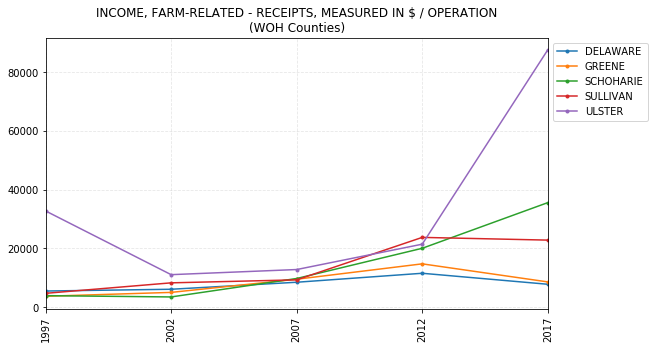

In [71]:
data_item = 'INCOME, FARM-RELATED - RECEIPTS, MEASURED IN $ / OPERATION'
subset_df = df[(df['Data Item']==data_item)
               & (df.Domain=='TOTAL')
               & (df.County.isin(WOH))]

plot_census_data(subset_df)
plt.title(data_item+'\n(WOH Counties)')


Text(0.5, 1.0, 'Ulster County: INCOME, FARM-RELATED Data')

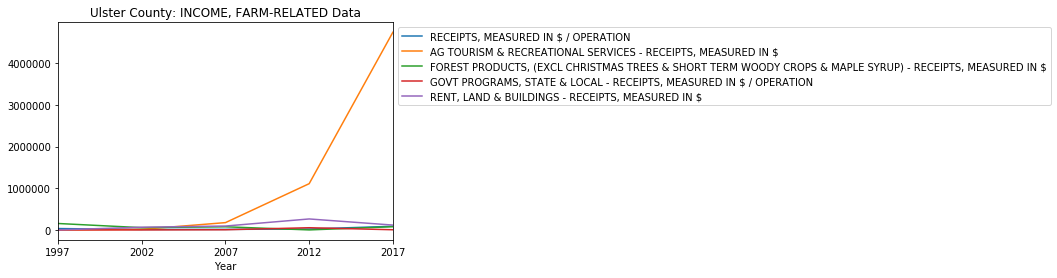

In [94]:
# investigate ulster's sharp increase from 2012 to 2017
ulster = df[(df.County=='ULSTER') 
   & (df['Data Item'].str.contains('INCOME'))
   & (df.Domain=='TOTAL')]\
    .pivot(index='Year', columns='Data Item', values='Value')\
    .apply(lambda col: (col.str.replace('[^0-9]', ''))\
                               .replace('', np.nan)\
                               .fillna(0)\
                               .astype('float', errors='ignore'), axis=0)

ulster.plot()
plt.xticks(ulster.index)
legend_labels = ulster.columns.str.replace('INCOME, FARM-RELATED, ', '')\
                    .str.replace('INCOME, FARM-RELATED - ', '')
plt.legend(labels=legend_labels, bbox_to_anchor=(1,1))
plt.title('Ulster County: INCOME, FARM-RELATED Data')